<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/19_Basic_regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Regression with Keras

## House Price Estimation Dataset

<div style="text-align:right;font-family:Tahoma">
House price estimation from visual and textual features
</div>
<p>
<a href="https://github.com/emanhamed/Houses-dataset" target="_blank">
https://github.com/emanhamed/Houses-dataset
</a>
<br>
<a href="https://arxiv.org/pdf/1609.08399.pdf" target="_blank">
https://arxiv.org/pdf/1609.08399.pdf
</a>
    
</p>

In [1]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import glob
import cv2
import os
import locale
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/emanhamed/Houses-dataset.git
%cd Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (2144/2144), done.
/content/Houses-dataset


In [3]:
'''
Attribute Information:

Number of Bedrooms
Number of bathrooms
Area
Zipcode
Price
'''
cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
df = pd.read_csv("Houses Dataset/HousesInfo.txt", sep=" ", header=None, names=cols)


In [4]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [5]:
zipcodes, counts = np.unique(df["zipcode"], return_counts=True)
print(zipcodes, counts)
# dict(zip(zipcodes, counts))

[36372 60002 60016 60046 62025 62034 62088 62214 62234 62249 81418 81521
 81524 85255 85262 85266 85331 85377 90038 90211 90265 90803 91752 91901
 91915 92021 92040 92253 92276 92543 92677 92692 92802 92880 93105 93111
 93314 93446 93510 93720 93924 94501 94531 94565 94568 95008 95220 96019
 98021] [  1   3   2   1   2   1   1   4   7   1   2   1  11  12   9  11   1   3
   1   1   1   1   3  32   1  11   1   2 100   1  26   2   9  49   1  11
   1  54  60   1   1  41  22   1   1   1  10  12   4]


In [6]:
df.shape

(535, 5)

In [7]:
# loop over each of the unique zip codes and their corresponding
# count
for (zipcode, count) in zip(zipcodes, counts):
    # the zip code counts for our housing dataset is *extremely*
    # unbalanced (some only having 1 or 2 houses per zip code)
    # so let's sanitize our data by removing any houses with less
    # than 25 houses per zip code
    if count < 25:
        idxs = df[df["zipcode"] == zipcode].index
        df.drop(idxs, inplace=True)

In [8]:
df.shape

(362, 5)

In [9]:
(train, test) = train_test_split(df, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(271, 5)
(91, 5)


## Preprocessing
Sacel every col to [0,1]

In [10]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (this will lead to
# better training and convergence)
maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice

In [11]:
# initialize the column names of the continuous data
continuous = ["bedrooms", "bathrooms", "area"]

# performin min-max scaling each continuous feature column to
# the range [0, 1]
# It scales the features in a way that their values lie between a given minimum and maximum value, typically between 0 and 1.
cs = MinMaxScaler()

# The fit() part calculates the minimum and maximum value for each feature, and the transform() part scales the features.
trainContinuous = cs.fit_transform(train[continuous])

# transform() method is used to scale the test data (test) based on the minimum and maximum values calculated from the training data.
testContinuous = cs.transform(test[continuous])

In [12]:
trainContinuous[0]

array([0.44444444, 0.45454545, 0.56262899])

In [13]:
df["zipcode"].unique()

array([93446, 91901, 92677, 94501, 92880, 92276, 93510])

In [14]:
df_practice = df["zipcode"]
df_practice

30     93446
32     93446
39     93446
80     91901
81     91901
       ...  
499    93446
500    93446
501    93446
502    93446
503    93446
Name: zipcode, Length: 362, dtype: int64

In [15]:
# Implement one-hot encoding

# First
lb = LabelBinarizer()
# calcualte the unique values
unique_values = lb.fit(df_practice)
# perform the one-hot based on the unique values
new_df = unique_values.transform(df_practice)
print(type(new_df))
new_df

# Second
# pd.get_dummies(df, columns=['Fruit'])
new_df = pd.get_dummies(df_practice)
print(type(new_df))
new_df

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


,91901,92276,92677,92880,93446,93510,94501
30,0,0,0,0,1,0,0
32,0,0,0,0,1,0,0
39,0,0,0,0,1,0,0
80,1,0,0,0,0,0,0
81,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
499,0,0,0,0,1,0,0
500,0,0,0,0,1,0,0
501,0,0,0,0,1,0,0
502,0,0,0,0,1,0,0


In [16]:
# one-hot encode the zip code categorical data (by definition of
# one-hot encoing, all output features are now in the range [0, 1])
zipBinarizer = LabelBinarizer().fit(df["zipcode"])
trainCategorical = zipBinarizer.transform(train["zipcode"])
testCategorical = zipBinarizer.transform(test["zipcode"])

In [17]:
# construct our training and testing data points by concatenating
# the categorical features with the continuous features
trainX = np.hstack([trainCategorical, trainContinuous])
testX = np.hstack([testCategorical, testContinuous])

print(trainX.shape)
print(testX.shape)

(271, 10)
(91, 10)


## Model architecture

In [18]:
dim = trainX.shape[1]
# define our MLP network
model=None
model = Sequential()
model.add(Dense(8, input_dim=dim, activation="relu"))
model.add(Dense(4, activation="relu"))
# for regression the last actvation function is linear === no action
model.add(Dense(1, activation="linear"))

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>

In [19]:
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
opt = Adam(learning_rate=1e-3)

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    decay_rate = 1e-3 / 200
    return lr * (1 / (1 + decay_rate * epoch))

lr_scheduler = LearningRateScheduler(scheduler)


model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [20]:
model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=200, batch_size=8, callbacks=[lr_scheduler])

Epoch 1/200
34/34 [==============================] - 9s 15ms/step - loss: 170.0555 - val_loss: 83.8825 - lr: 0.0010
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 62.2991 - val_loss: 55.3627 - lr: 1.0000e-03
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 46.2062 - val_loss: 47.9011 - lr: 9.9999e-04
Epoch 4/200
34/34 [==============================] - 0s 8ms/step - loss: 42.5387 - val_loss: 43.1980 - lr: 9.9997e-04
Epoch 5/200
34/34 [==============================] - 0s 13ms/step - loss: 39.7969 - val_loss: 37.8295 - lr: 9.9995e-04
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 35.8851 - val_loss: 31.3678 - lr: 9.9992e-04
Epoch 7/200
34/34 [==============================] - 0s 14ms/step - loss: 30.6584 - val_loss: 26.6754 - lr: 9.9989e-04
Epoch 8/200
34/34 [==============================] - 0s 9ms/step - loss: 27.0406 - val_loss: 23.5597 - lr: 9.9986e-04
Epoch 9/200
34/34 [==============================] - 0s 

In [21]:
model.evaluate(testX, testY)

3/3 [==============================] - 0s 4ms/step - loss: 23.0924


23.092443466186523

In [22]:
preds = model.predict(testX)

3/3 [==============================] - 0s 3ms/step


In [23]:
preds.shape

(91, 1)

In [24]:
testY.shape

(91,)

In [25]:
preds.flatten() - testY

305   -0.005163
110    0.025632
92    -0.055330
464   -0.041585
145    0.007235
         ...   
458   -0.028004
452   -0.007563
481   -0.020857
232   -0.022699
437   -0.000738
Name: price, Length: 91, dtype: float64

In [26]:
# make predictions on the testing data
preds = model.predict(testX)

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("avg. house price: {}, std house price: {}".format(
    locale.currency(df["price"].mean(), grouping=True),
    locale.currency(df["price"].std(), grouping=True)))
print("mean: {:.2f}%, std: {:.2f}%".format(mean, std))

3/3 [==============================] - 0s 3ms/step
avg. house price: $533,388.27, std house price: $493,403.08
mean: 23.09%, std: 18.69%


In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(testX)
mse = mean_squared_error(testY, predictions)
mse

3/3 [==============================] - 0s 2ms/step


0.0010155557681256584

# Functional API

When the network is divided into two separate sections, for example we have numbers and images both as an input, we need to use the functional API coding based on the keras to be able to join the different parts of the network together.  
Also, we can have two outputs in the network rather than only the one last output.


In [28]:
df

,bedrooms,bathrooms,area,zipcode,price
30,5,3.0,2520,93446,789000
32,3,2.0,1802,93446,365000
39,3,3.0,2146,93446,455000
80,4,2.5,2464,91901,599000
81,2,2.0,1845,91901,529800
...,...,...,...,...,...
499,4,4.0,3000,93446,1495000
500,3,2.0,2330,93446,599900
501,3,2.5,1339,93446,344900
502,3,2.0,1472,93446,309995


In [29]:
df[df["zipcode"] < 25]

,bedrooms,bathrooms,area,zipcode,price


In [30]:
# 362 houses > 4 image peer house
datasetPath = "Houses Dataset"
basePath = os.path.sep.join([datasetPath, "1_*"])
print(basePath)
sorted(list(glob.glob(basePath)))

Houses Dataset/1_*


['Houses Dataset/1_bathroom.jpg',
 'Houses Dataset/1_bedroom.jpg',
 'Houses Dataset/1_frontal.jpg',
 'Houses Dataset/1_kitchen.jpg']

In [31]:
# initialize our images array (i.e., the house images themselves)
images = []

# loop over the indexes of the houses
for i in df.index.values:
    # find the four images for the house and sort the file paths,
    # ensuring the four are always in the *same order*
    basePath = os.path.sep.join([datasetPath, "{}_*".format(i + 1)])
    housePaths = sorted(list(glob.glob(basePath)))
    # initialize our list of input images along with the output image
    # after *combining* the four input images
    inputImages = []
    outputImage = np.zeros((64, 64, 3), dtype="uint8")

    # loop over the input house paths
    for housePath in housePaths:
        # load the input image, resize it to be 32 32, and then
        # update the list of input images
        image = cv2.imread(housePath)
        image = cv2.resize(image, (32, 32))
        inputImages.append(image)

    # tile the four input images in the output image such the first
    # image goes in the top-right corner, the second image in the
    # top-left corner, the third image in the bottom-right corner,
    # and the final image in the bottom-left corner
    outputImage[0:32, 0:32] = inputImages[0]
    outputImage[0:32, 32:64] = inputImages[1]
    outputImage[32:64, 32:64] = inputImages[2]
    outputImage[32:64, 0:32] = inputImages[3]

    # add the tiled image to our set of images the network will be
    # trained on
    images.append(outputImage)
images = np.array(images)

In [32]:
images.shape

(362, 64, 64, 3)

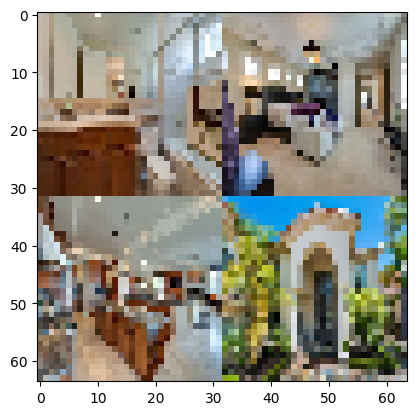

In [33]:
plt.imshow(images[37][...,::-1])

In [34]:
images = images / 255.0

In [35]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
split = train_test_split(df, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

In [36]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
maxPrice = trainAttrX["price"].max()
trainY = trainAttrX["price"] / maxPrice
testY = testAttrX["price"] / maxPrice

In [37]:
model=None

In [38]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

width, height, depth = 64, 64, 3
filters=(16, 32, 64)
# initialize the input shape and channel dimension, assuming
# TensorFlow/channels-last ordering
inputShape = (height, width, depth)
chanDim = -1

# define the model input
inputs = Input(shape=inputShape)

# loop over the number of filters
for (i, f) in enumerate(filters):
    # if this is the first CONV layer then set the input
    # appropriately
    if i == 0:
        x = inputs

    # CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

# flatten the volume, then FC => RELU => BN => DROPOUT
x = Flatten()(x)
x = Dense(16)(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=chanDim)(x)
x = Dropout(0.5)(x)

# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
x = Dense(4)(x)
x = Activation("relu")(x)


x = Dense(1, activation="linear")(x)

# construct the CNN
model = Model(inputs, x)

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 activation (Activation)     (None, 64, 64, 16)        0         
                                                                 
 batch_normalization (Batch  (None, 64, 64, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640  

In [40]:
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
opt = Adam(learning_rate=1e-3)

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    decay_rate = 1e-3 / 200
    return lr * (1 / (1 + decay_rate * epoch))

lr_scheduler = LearningRateScheduler(scheduler)


model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [42]:
model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
          epochs=200, batch_size=8, callbacks=[lr_scheduler])

Epoch 1/200
34/34 [==============================] - 1s 24ms/step - loss: 1072.5166 - val_loss: 310.9883 - lr: 0.0010
Epoch 2/200
34/34 [==============================] - 0s 13ms/step - loss: 684.3867 - val_loss: 511.2831 - lr: 1.0000e-03
Epoch 3/200
34/34 [==============================] - 0s 12ms/step - loss: 591.5347 - val_loss: 494.4529 - lr: 9.9999e-04
Epoch 4/200
34/34 [==============================] - 0s 11ms/step - loss: 390.8344 - val_loss: 873.2717 - lr: 9.9997e-04
Epoch 5/200
34/34 [==============================] - 1s 20ms/step - loss: 357.0890 - val_loss: 1308.2455 - lr: 9.9995e-04
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 268.3344 - val_loss: 1812.2729 - lr: 9.9992e-04
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 275.1304 - val_loss: 2518.5366 - lr: 9.9989e-04
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 242.1541 - val_loss: 3656.9028 - lr: 9.9986e-04
Epoch 9/200
34/34 [===============

In [50]:
model.evaluate(testImagesX, testY)

3/3 [==============================] - 0s 83ms/step - loss: 58.1126


58.112552642822266

# Mixed Input

In [51]:
# We did the normalization for the image and price only

continuous = ["bedrooms", "bathrooms", "area"]
cs = MinMaxScaler()
trainContinuous = cs.fit_transform(trainAttrX[continuous])
testContinuous = cs.transform(testAttrX[continuous])

zipBinarizer = LabelBinarizer().fit(df["zipcode"])
trainCategorical = zipBinarizer.transform(trainAttrX["zipcode"])
testCategorical = zipBinarizer.transform(testAttrX["zipcode"])

trainX = np.hstack([trainCategorical, trainContinuous])
testX = np.hstack([testCategorical, testContinuous])

In [66]:
model=None

In [67]:
dim = trainAttrX.shape[1] #10

# define our MLP network
mlp = Sequential()
mlp.add(Dense(8, input_dim=dim, activation="relu"))
mlp.add(Dense(4, activation="relu"))

In [68]:
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dense, Flatten, Dropout

width, height, depth = 64, 64, 3
filters=(16, 32, 64)
# initialize the input shape and channel dimension, assuming
# TensorFlow/channels-last ordering
inputShape = (height, width, depth)

# define the model input
inputs = Input(shape=inputShape)

# loop over the number of filters
for (i, f) in enumerate(filters):
    # if this is the first CONV layer then set the input
    # appropriately
    if i == 0:
        x = inputs

    # CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

# flatten the volume, then FC => RELU => BN => DROPOUT
x = Flatten()(x)
x = Dense(16)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
x = Dense(4)(x)
x = Activation("relu")(x)

# construct the CNN
cnn = Model(inputs, x)

In [69]:
from keras.layers import concatenate
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
# both the mlp output and the cnn output has 4 neurons > concat > result = 8 neurons
combinedInput = concatenate([mlp.output, cnn.output])

# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

model = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [70]:
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
opt = Adam(learning_rate=1e-3)

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    decay_rate = 1e-3 / 200
    return lr * (1 / (1 + decay_rate * epoch))

lr_scheduler = LearningRateScheduler(scheduler)


model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [71]:
# train the model
model.fit(
    [trainAttrX, trainImagesX], trainY,
    validation_data=([testAttrX, testImagesX], testY),
    epochs=200, batch_size=8,
    callbacks=[lr_scheduler])

Epoch 1/200
34/34 [==============================] - 5s 14ms/step - loss: 593889.6250 - val_loss: 70.9414 - lr: 0.0010
Epoch 2/200
34/34 [==============================] - 0s 9ms/step - loss: 202817.9062 - val_loss: 71.0143 - lr: 1.0000e-03
Epoch 3/200
34/34 [==============================] - 0s 8ms/step - loss: 102240.3828 - val_loss: 71.5096 - lr: 9.9999e-04
Epoch 4/200
34/34 [==============================] - 0s 10ms/step - loss: 33695.9062 - val_loss: 71.4615 - lr: 9.9997e-04
Epoch 5/200
34/34 [==============================] - 0s 12ms/step - loss: 6906.2422 - val_loss: 71.0990 - lr: 9.9995e-04
Epoch 6/200
34/34 [==============================] - 0s 13ms/step - loss: 67.0726 - val_loss: 71.4103 - lr: 9.9992e-04
Epoch 7/200
34/34 [==============================] - 0s 11ms/step - loss: 66.9755 - val_loss: 71.1337 - lr: 9.9989e-04
Epoch 8/200
34/34 [==============================] - 0s 12ms/step - loss: 66.8859 - val_loss: 71.0350 - lr: 9.9986e-04
Epoch 9/200
34/34 [==================

In [72]:
model.evaluate([testAttrX, testImagesX], testY)

3/3 [==============================] - 0s 5ms/step - loss: 71.3858


71.38579559326172

In [73]:
# make predictions on the testing data
preds = model.predict([testAttrX, testImagesX])

3/3 [==============================] - 0s 4ms/step


In [74]:
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
    locale.currency(df["price"].mean(), grouping=True),
    locale.currency(df["price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] avg. house price: $533,388.27, std house price: $493,403.08
[INFO] mean: 71.39%, std: 22.18%
